<a href="https://colab.research.google.com/github/puja-maitra/Unclear/blob/main/Assignment_Week1_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
uploaded =files.upload()

Saving TestImage.jpg to TestImage.jpg


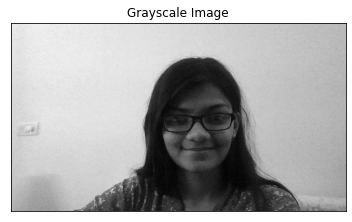

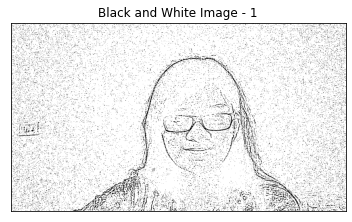

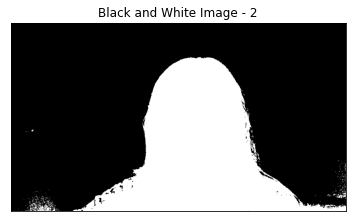

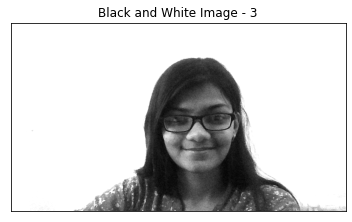

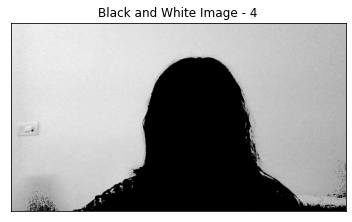

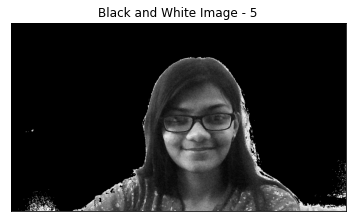

In [ ]:
# question 1
%matplotlib inline                                                                     
img = cv2.imread('TestImage.jpg')
# grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# adaptive thresholding , we don't use 'ret' here
thr1 = cv2.adaptiveThreshold( img , 255 ,cv2.ADAPTIVE_THRESH_MEAN_C , \
                                  cv2.THRESH_BINARY , 7 , 5 )
# thresholding, classical , we need to use 'ret' here
ret , thr2 = cv2.threshold( img , 127 ,  255 , cv2.THRESH_BINARY_INV)
ret , thr3 = cv2.threshold( img , 127 ,  255 , cv2.THRESH_TRUNC)
ret , thr4 = cv2.threshold( img , 127 ,  255 , cv2.THRESH_TOZERO)
ret , thr5 = cv2.threshold( img , 127 ,  255 , cv2.THRESH_TOZERO_INV)
images = [ img , thr1 , thr2 , thr3 , thr4 , thr5]
titles = ['Grayscale Image' , 'Black and White Image - 1' , 'Black and White Image - 2' ,'Black and White Image - 3' , 'Black and White Image - 4','Black and White Image - 5' , 'Black and White Image - 6']
for i in range (6):
  # cmap = 'grey' is important
  plt.imshow( images[i] , cmap='gray')
  plt.title( titles[i])
  plt.xticks([])
  plt.yticks([])  
  plt.show()

In [ ]:
# to open webcam using colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


# for opening webcam using opencv only, Q2_Assignment1
import cv2
cap = cv2.VideoCapture(0)
while (True):
    _, frame = cap.read()
    cv2.imshow('frame' , frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
        



In [ ]:
# for opening webcam using opencv only, Q2_Assignment1
import cv2
cap = cv2.VideoCapture(0)
while (True):
    _, frame = cap.read()
    cv2.imshow('frame' , frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [ ]:
# changing the red in the video to blue , Q3_Assignment1_verVideo
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
while (True):
    _ , frame = cap.read()
    hsv = cv2.cvtColor( frame , cv2.COLOR_BGR2HSV)
    lower_red = np.array([170,50,50])
    upper_red = np.array([190,255,255])
    mask = cv2.inRange(hsv , lower_red , upper_red)
    res = cv2.bitwise_and( frame , frame , mask = mask)
    res[mask>0] = (255 , 0 , 0)
    cv2.imshow(frame)
    cv2.imshow(mask)
    cv2.imshow(res)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
        



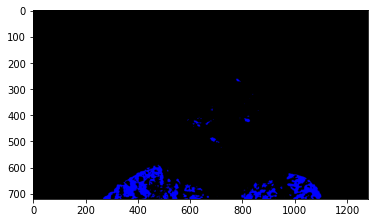

In [9]:
# changing the red in the image to blue , Q3_Assignment1
import cv2
import numpy as np

img = cv2.imread('TestImage.jpg')
hsv = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)
lower_red = np.array([170,50,50])
upper_red = np.array([190,255,255])
mask = cv2.inRange(hsv , lower_red , upper_red)
res = cv2.bitwise_and( img , img , mask = mask)
res[mask>0] = (255 , 0 , 0)
plt.imshow(res[:,:,::-1])
plt.show()



In [ ]:
upload1 = files.upload()

Saving T.png to T.png


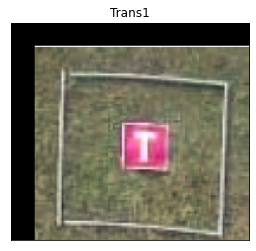

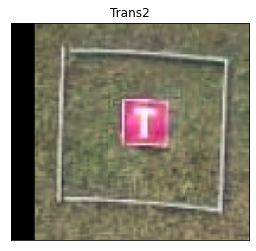

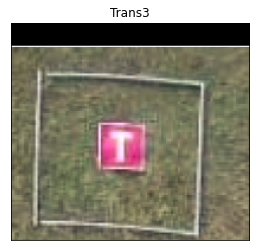

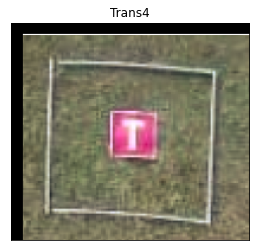

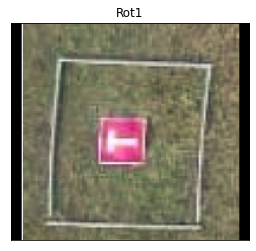

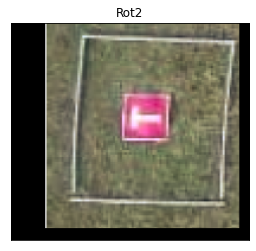

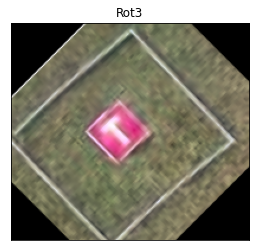

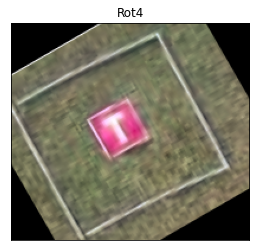

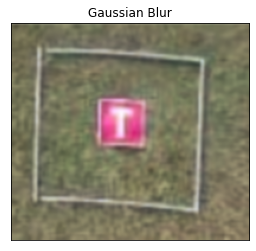

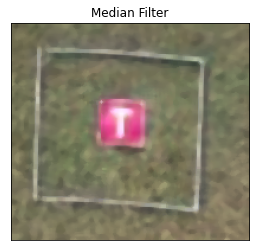

In [ ]:
# 4 translation + 4 rotation + 2 blurrings
img = cv2.imread('T.png')
img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB)
rows , cols , x = img.shape

#translation1
M1 = np.float32([[ 1 , 0 , 20 ] , [ 0 , 1 , 20 ]])    #translation matrix
dst1 = cv2.warpAffine(img , M1 , (cols , rows))

#translation2
M2 = np.float32([[ 1 , 0 , 20 ] , [ 0 , 1 , 0 ]])    #translation matrix
dst2 = cv2.warpAffine(img , M2 , (cols , rows))

#translation3
M3 = np.float32([[ 1 , 0 , 0 ] , [ 0 , 1 , 20 ]])    #translation matrix
dst3 = cv2.warpAffine(img , M3 , (cols , rows))

#translation4
M4 = np.float32([[ 1 , 0 , 10 ] , [ 0 , 1 , 10 ]])    #translation matrix
dst4 = cv2.warpAffine(img , M4 , (cols , rows))

#rotation1
MR1 = cv2.getRotationMatrix2D((cols/2,rows/2) , 90 , 1)  #rotation matrix
dstR1 = cv2.warpAffine( img , MR1 , (cols,rows))

#rotation2+translation1
rows1,cols1,x1 = dst1.shape
MR2 = cv2.getRotationMatrix2D((cols1/2,rows1/2) , 90 , 1)  #rotation matrix
dstR2 = cv2.warpAffine( dst1 , MR2 , (cols1,rows1))

#rotation3
MR3 = cv2.getRotationMatrix2D((cols/2,rows/2) , 45 , 1)  #rotation matrix
dstR3 = cv2.warpAffine( img , MR3 , (cols,rows))

#rotation4
MR4 = cv2.getRotationMatrix2D((cols/2,rows/2) , 30 , 1)  #rotation matrix
dstR4 = cv2.warpAffine( img , MR4 , (cols,rows))

#blurring1 = gaussian blur
blur_gaussian = cv2.GaussianBlur(img , (5,5) , 0)

#blurring2 = Median Filter
blur_median = cv2.medianBlur(img , 5)

#lists
dst = [ dst1 , dst2 , dst3 , dst4]
title = ["Trans1" , "Trans2" , "Trans3" , "Trans4"]
dstR = [ dstR1 , dstR2 , dstR3 , dstR4]
titleR = ["Rot1" , "Rot2" , "Rot3" , "Rot4"]
blur = [blur_gaussian , blur_median]
titleB =["Gaussian Blur" , "Median Filter"]

#translated images
for i in range(4):
  plt.imshow(dst[i])
  plt.title(title[i])
  plt.xticks([]) , plt.yticks([])
  plt.show()

#rotated images
for i in range(4):
  plt.imshow(dstR[i])
  plt.title(titleR[i])
  plt.xticks([]) , plt.yticks([])
  plt.show()

#blurs
for i in range(2):
  plt.imshow(blur[i])
  plt.title(titleB[i])
  plt.xticks([]) , plt.yticks([])
  plt.show()


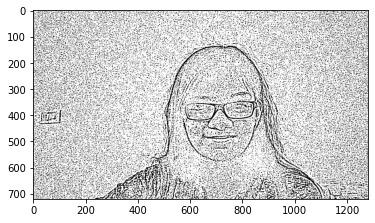

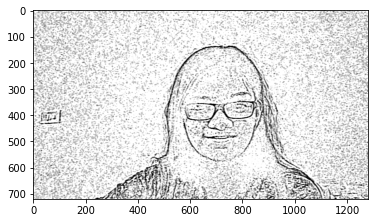

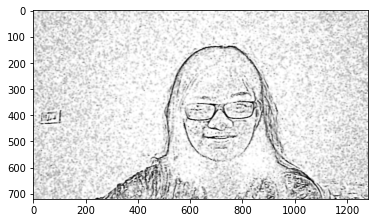

In [71]:
#Q1_Assignment3
#Attempt1;second attempt with canny edge detection preferably
img = cv2.imread('TestImage.jpg')

# grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# adaptive thresholding , we don't use 'ret' here
thr1 = cv2.adaptiveThreshold( img , 255 ,cv2.ADAPTIVE_THRESH_MEAN_C , \
                                  cv2.THRESH_BINARY , 9 , 3 )
k = cv2.getGaussianKernel(5, 0)
blur = cv2.GaussianBlur(thr1 , k.shape , 1)

blur2 = cv2.medianBlur(blur , 5)

blur3 = cv2.bilateralFilter(blur2 , 9 ,75 , 75)
#in python, you can use <argument_name> = x in the later ones 
#and not in the first ones
#but not the other way around;python doesn't like that

plt.imshow(thr1 , cmap = 'gray')
plt.show()
plt.imshow(blur2 , cmap = 'gray')
plt.show()
plt.imshow(blur3 , cmap = 'gray')
plt.show()

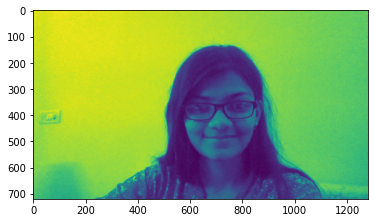

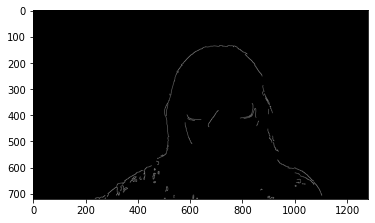

In [68]:
#Q1_Assignment3
#Attempt2 - failed
img = cv2.imread('TestImage.jpg')

# grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#canny edges
#first remove noise
img= cv2.GaussianBlur(img, (5,5) , 0)
edge = cv2.Canny(img , 100 , 200)

plt.imshow(img)
plt.show()
plt.imshow(edge , cmap ='gray')
plt.show()